In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import seaborn as sns

import matplotlib.pylab as plt

start = datetime(2022, 6, 12, 12,0,0)

In [2]:
rfar = pd.DataFrame([['старт',0,0,0,0,0,0],
                     ['Пролог этап 1',50,50,0,0,0,0],
                     ['центр 1',10,10,0,0,0,0],
                     ['Байдарка этап 2',315,465,0,0,0,0],
                     ['центр 2',10,10,0,0,0,0],
                     ['Трекинг этап 3',140,190,0,0,0,0],
                     ['тех 1',0,30,0,0,0,0],
                     ['центр 3',10,10,0,0,0,0],
                     ['Вело этап 4',115,130,0,0,0,0],
                     ['транзит 1',10,10,0,0,0,0],
                     ['тех 2',0,30,0,0,0,0],
                     ['тех 3',0,30,0,0,0,0],
                     ['Трекинг этап 5',37,75,0,0,0,0],
                     ['Вело этап 6',140,205,0,0,0,0],
                     ['транзит 2',20,20,0,0,0,0],
                     ['Пакрафтинг этап 7',130,210,0,0,0,0],
                     ['транзит 3',20,20,0,0,0,0],
                     ['Легенда этап 8',0,60,0,0,0,0],
                     ['Вело этап 9',180,420,0,0,0,0]],
                    columns=['этап','min','max','point_min','point_max','optimal','point_optimal'])

In [3]:
mask_optimal ={'старт':1,
               'Пролог этап 1':1,
               'центр 1':1,
               'Байдарка этап 2':0,
               'центр 2':1,
               'Трекинг этап 3':1,
               'тех 1':0,
               'центр 3':1,
               'Вело этап 4':1,
               'транзит 1':1,
               'тех 2':0,
               'тех 3':0,
               'Трекинг этап 5':1,
               'Вело этап 6':1,
               'транзит 2':1,
               'Пакрафтинг этап 7':0,
               'транзит 3':1,
               'Легенда этап 8':1,
               'Вело этап 9':0}
for mask, index in zip(mask_optimal,range(len(mask_optimal))):
    if mask_optimal[mask] == 1:
        rfar.loc[index,'optimal'] = rfar.loc[index,'max']
        rfar.loc[index,'point_optimal'] = rfar.loc[index,'point_max']
    else:
        rfar.loc[index,'optimal'] = rfar.loc[index,'min']
        rfar.loc[index,'point_optimal'] = rfar.loc[index,'point_min']

In [4]:
for index in range(rfar.shape[0]):
    rfar.loc[index,'time_min'] = start + timedelta(minutes=sum(rfar.loc[0:index,'min']))
    rfar.loc[index,'time_max'] = start + timedelta(minutes=sum(rfar.loc[0:index,'max']))
    rfar.loc[index,'time_optimal'] = start + timedelta(minutes=sum(rfar.loc[0:index,'optimal']))

In [5]:
rfar

,этап,min,max,point_min,point_max,optimal,point_optimal,time_min,time_max,time_optimal
0,старт,0,0,0,0,0,0,2022-06-12 12:00:00,2022-06-12 12:00:00,2022-06-12 12:00:00
1,Пролог этап 1,50,50,0,0,50,0,2022-06-12 12:50:00,2022-06-12 12:50:00,2022-06-12 12:50:00
2,центр 1,10,10,0,0,10,0,2022-06-12 13:00:00,2022-06-12 13:00:00,2022-06-12 13:00:00
3,Байдарка этап 2,315,465,0,0,315,0,2022-06-12 18:15:00,2022-06-12 20:45:00,2022-06-12 18:15:00
4,центр 2,10,10,0,0,10,0,2022-06-12 18:25:00,2022-06-12 20:55:00,2022-06-12 18:25:00
5,Трекинг этап 3,140,190,0,0,190,0,2022-06-12 20:45:00,2022-06-13 00:05:00,2022-06-12 21:35:00
6,тех 1,0,30,0,0,0,0,2022-06-12 20:45:00,2022-06-13 00:35:00,2022-06-12 21:35:00
7,центр 3,10,10,0,0,10,0,2022-06-12 20:55:00,2022-06-13 00:45:00,2022-06-12 21:45:00
8,Вело этап 4,115,130,0,0,130,0,2022-06-12 22:50:00,2022-06-13 02:55:00,2022-06-12 23:55:00
9,транзит 1,10,10,0,0,10,0,2022-06-12 23:00:00,2022-06-13 03:05:00,2022-06-13 00:05:00


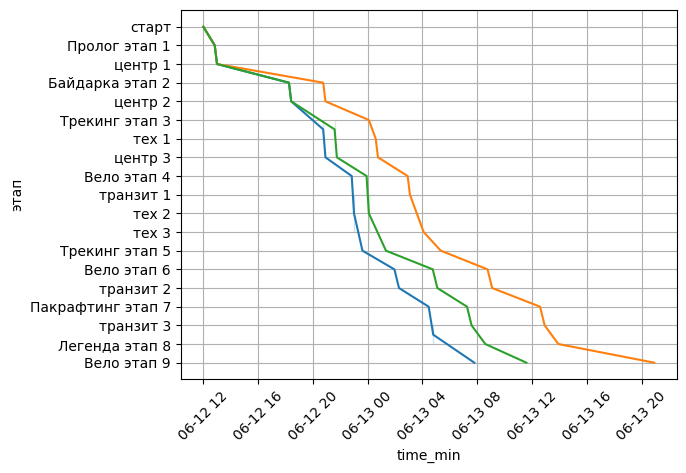

In [6]:
g = sns.lineplot(data=rfar, x="time_min", y="этап")
g = sns.lineplot(data=rfar, x="time_max", y="этап")
g = sns.lineplot(data=rfar, x="time_optimal", y="этап")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [7]:
rfar[['этап','time_optimal']]

,этап,time_optimal
0,старт,2022-06-12 12:00:00
1,Пролог этап 1,2022-06-12 12:50:00
2,центр 1,2022-06-12 13:00:00
3,Байдарка этап 2,2022-06-12 18:15:00
4,центр 2,2022-06-12 18:25:00
5,Трекинг этап 3,2022-06-12 21:35:00
6,тех 1,2022-06-12 21:35:00
7,центр 3,2022-06-12 21:45:00
8,Вело этап 4,2022-06-12 23:55:00
9,транзит 1,2022-06-13 00:05:00


In [8]:
rfar['point_optimal'].sum()

0